In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",1000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the csv files
train=pd.read_csv("/content/gdrive/MyDrive/capstone/fraudTrain.csv")
test=pd.read_csv("/content/gdrive/MyDrive/capstone/fraudTest.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
#Checking the number of rows & columns in the dataframe
train.shape

(1296675, 23)

In [6]:
test.shape

(555719, 23)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:
#Removing Unnamed column
train.drop("Unnamed: 0",axis=1,inplace=True)

test.drop("Unnamed: 0",axis=1,inplace=True)

train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
#Converting dob,trans_date_trans_time column in both test & train to datetime data type
train["trans_date_trans_time"]=pd.to_datetime(train["trans_date_trans_time"])
train["trans_date"]=train["trans_date_trans_time"].dt.strftime("%Y-%m-%d")
train["trans_date"]=pd.to_datetime(train["trans_date"])
train["dob"]=pd.to_datetime(train["dob"])
test["trans_date_trans_time"]=pd.to_datetime(test["trans_date_trans_time"])
test["trans_date"]=test["trans_date_trans_time"].dt.strftime("%Y-%m-%d")
test["trans_date"]=pd.to_datetime(test["trans_date"])
test["dob"]=pd.to_datetime(test["dob"])
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [13]:
#Removing unnecessary columns
remove_col=["cc_num","merchant","first","last","street","zip","trans_num","unix_time"]

train_1=train.drop(remove_col,axis=1)

test_1=test.drop(remove_col,axis=1)

train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

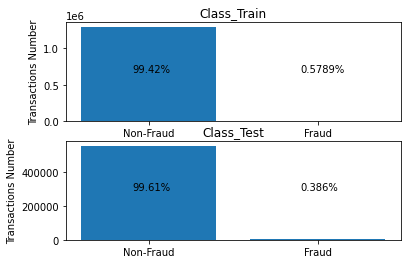

In [14]:
#Class Imbalance

cl_train=train_1["is_fraud"].value_counts()
normal_train=cl_train[0]/train_1["is_fraud"].count()*100
fraud_train=cl_train[1]/train_1['is_fraud'].count()*100
cl_test=test_1["is_fraud"].value_counts()
normal_test=cl_test[0]/test_1['is_fraud'].count()*100
fraud_test=cl_test[1]/test_1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(["Non-Fraud","Fraud"],cl_train)
plt.title("Class_Train")
plt.ylabel("Transactions Number")
plt.annotate("{0:.4}%".format(normal_train),(0.2, 0.5),xycoords="axes fraction")
plt.annotate("{0:.4}%".format(fraud_train),(0.7, 0.5),xycoords="axes fraction")

plt.subplot(2,1,2)
plt.bar(["Non-Fraud","Fraud"],cl_test)
plt.title("Class_Test")
plt.ylabel("Transactions Number")
plt.annotate("{0:.4}%".format(normal_test),(0.2, 0.5),xycoords="axes fraction")
plt.annotate("{0:.4}%".format(fraud_test),(0.7, 0.5),xycoords="axes fraction")
plt.show()

In [15]:
#Creating field for age on transaction date

train_1["age_at_trans"]=train_1["trans_date"]-train_1["dob"]
train_1["age_at_trans"]=train_1["age_at_trans"].astype("timedelta64[Y]")

test_1["age_at_trans"]=test_1["trans_date"]-test_1["dob"]
test_1["age_at_trans"]=test_1["age_at_trans"].astype("timedelta64[Y]")
train_1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [16]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [17]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [18]:
frauds=pd.DataFrame(train_1.groupby("state")["is_fraud"].sum())

frauds=frauds[frauds["is_fraud"]>0]

frauds.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [19]:
fraudj=pd.DataFrame(train_1.groupby("job")["is_fraud"].sum())

fraudj=fraudj[fraudj["is_fraud"]>0]

fraudj.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [20]:
fraudc=pd.DataFrame(train_1.groupby("city")["is_fraud"].sum())

fraudc=fraudc[fraudc["is_fraud"]>0]

fraudc.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [21]:
# Finding distance from customer location to merchant location in terms of latitude and longitude
train_1["lat_dist"]=abs(round(train_1["merch_lat"]-train_1["lat"],3))
train_1["long_dist"]=abs(round(train_1["merch_long"]-train_1["long"],3))

test_1["lat_dist"]=abs(round(test_1["merch_lat"]-test_1["lat"],3))
test_1["long_dist"]=abs(round(test_1["merch_long"]-test_1["long"],3))

train_1[["merch_lat","lat","lat_dist","merch_long","long","long_dist"]].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [22]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [23]:
# Month column
train_1["trans_month"]=pd.DatetimeIndex(train_1["trans_date"]).month

test_1["trans_month"]=pd.DatetimeIndex(test_1["trans_date"]).month

train_1[["trans_date_trans_time","trans_month"]].head()

,trans_date_trans_time,trans_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [24]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [25]:
train_1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [26]:
test_1.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_month                   7
dtype: int64

**Check for any highly skewed categorical variables**

In [27]:
round(train_1["state"].value_counts()/len(train_1.index)*100,2)

TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: state, dtype: float64

In [28]:
round(train_1["category"].value_counts()/len(train_1.index)*100,2)

gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64

In [29]:
round(train_1["city"].value_counts()/len(train_1.index)*100,2)

Birmingham                   0.43
San Antonio                  0.40
Utica                        0.39
Phoenix                      0.39
Meridian                     0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.36
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.31
Brandon                      0.31
Fulton                       0.31
Lahoma                       0.28
Allentown                    0.28
Lakeland                     0.28
Dallas                       0.28
Washington                   0.28
Andrews                      0.28
Detroit                      0.28
Huntsville                   0.27
Hudson                       0.27
Orient                       0.27
Fort Washakie                0.27
Philadelphia                 0.27
Uledi                        0.24
Elberta       

In [30]:
round(train_1["gender"].value_counts()/len(train_1.index)*100,2)

F    54.74
M    45.26
Name: gender, dtype: float64

In [31]:
round(train_1["job"].value_counts()/len(train_1.index)*100,2)

Film/video editor                                              0.75
Exhibition designer                                            0.71
Naval architect                                                0.67
Surveyor, land/geomatics                                       0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.63
Systems developer                                              0.59
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.58
Chartered public finance accountant                            0.56
Scientist, audiological                                        0.55
Chief Executive Officer                                        0.55
Copywriter, advertising                                        0.55
Comptroller                                     

In [32]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [33]:
train_1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [34]:
#Removing unnecessary variables
remove_col=["trans_date_trans_time","city","lat","long","job","dob","merch_lat","merch_long","trans_date"]

train_2=train_1.drop(remove_col,axis=1)

test_2=test_1.drop(remove_col,axis=1)

train_2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,0.254,0.830,1


In [35]:
#Binary mapping on Gender
train_2["gender"]=train_2["gender"].map({"M": 1,"F": 0})

test_2["gender"]=test_2["gender"].map({"M": 1,"F": 0})

train_2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32.0,0.254,0.830,1


In [36]:
train_2[["amt","city_pop","age_at_trans","lat_dist","long_dist"]].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549592e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739739e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [37]:
#Creating Categorical Dummy Variables
train_3=pd.get_dummies(train_2,columns=["category"],drop_first=True)

test_3=pd.get_dummies(test_2,columns=["category"],drop_first=True)

train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  float64
 6   lat_dist                 1296675 non-null  float64
 7   long_dist                1296675 non-null  float64
 8   trans_month              1296675 non-null  int64  
 9   category_food_dining     1296675 non-null  uint8  
 10  category_gas_transport   1296675 non-null  uint8  
 11  category_grocery_net     1296675 non-null  uint8  
 12  category_grocery_pos     1296675 non-null  uint8  
 13  category_health_fitness  1296675 non-null 

Building Model

In [38]:
#Removing State
train_4=train_3.drop("state",axis=1)

test_4=test_3.drop("state",axis=1)

train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  float64
 5   lat_dist                 1296675 non-null  float64
 6   long_dist                1296675 non-null  float64
 7   trans_month              1296675 non-null  int64  
 8   category_food_dining     1296675 non-null  uint8  
 9   category_gas_transport   1296675 non-null  uint8  
 10  category_grocery_net     1296675 non-null  uint8  
 11  category_grocery_pos     1296675 non-null  uint8  
 12  category_health_fitness  1296675 non-null  uint8  
 13  category_home            1296675 non-null 

In [39]:
#Splitting train and test dataset into X and y
train_X=train_4.drop(["is_fraud"],axis=1)

train_Y=train_4["is_fraud"]

test_X=test_4.drop(["is_fraud"],axis=1)

test_Y=test_4["is_fraud"]

**Oversampling data**

In [40]:
#Oversampling Using ADASYN

from imblearn.over_sampling import ADASYN

train_X_res,train_Y_res=ADASYN().fit_resample(train_X,train_Y)

from collections import Counter

print(sorted(Counter(train_Y_res).items()))

[(0, 1289169), (1, 1288749)]


**Building a Forest Model**

In [41]:
#Importing necessary library

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve


In [42]:
RFC=RandomForestClassifier(n_estimators=10,max_depth=5,max_features=12,min_samples_leaf=100,random_state=100,oob_score=True)

In [43]:
RFC.fit(train_X_res,train_Y_res)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [44]:
RFC.oob_score_

0.8841076403516326

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


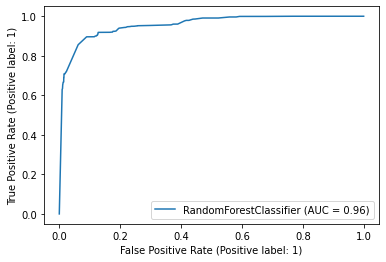

In [45]:
plot_roc_curve(RFC,train_X_res,train_Y_res)
plt.show()

The ROC Curve is perfect in accordance to the confusion matrix

In [46]:
df=pd.DataFrame({"Varname": train_X.columns,"Imp": RFC.feature_importances_})

In [47]:
df.sort_values(by="Imp",ascending=False)

,Varname,Imp
0,amt,0.877641
13,category_kids_pets,0.029069
8,category_gas_transport,0.023561
18,category_shopping_pos,0.012858
12,category_home,0.012682
19,category_travel,0.010911
10,category_grocery_pos,0.010098
15,category_misc_pos,0.008823
17,category_shopping_net,0.003885
7,category_food_dining,0.003562


In [48]:
train_Y_pre=RFC.predict(train_X_res)
train_Y_pre[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(train_Y_res,train_Y_pre))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89   1289169
           1       0.89      0.90      0.89   1288749

    accuracy                           0.89   2577918
   macro avg       0.89      0.89      0.89   2577918
weighted avg       0.89      0.89      0.89   2577918



**Test Set Prediction**

In [50]:
test_Y_pre=RFC.predict(test_X)
test_Y_pre[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [51]:
print(classification_report(test_Y,test_Y_pre))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.92      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.91      0.50    555719
weighted avg       1.00      0.89      0.94    555719



**Testing model without oversampling**

In [52]:
train_Y_pre=RFC.predict(train_X)

test_Y_pre=RFC.predict(test_X)

print(classification_report(train_Y,train_Y_pre))

print(classification_report(test_Y,test_Y_pre))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1289169
           1       0.05      0.93      0.09      7506

    accuracy                           0.89   1296675
   macro avg       0.52      0.91      0.52   1296675
weighted avg       0.99      0.89      0.94   1296675

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.92      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.91      0.50    555719
weighted avg       1.00      0.89      0.94    555719



In [53]:
train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
dtype: int64

In [54]:
train.shape

(1296675, 23)

In [55]:
#train Subset
train_mer=train[["trans_date_trans_time","amt","trans_num","is_fraud"]]

train_mer.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [56]:
#train_Y_pre Dataframe
train_pre=pd.DataFrame(train_Y_pre)

train_pre.head()

,0
0,0
1,0
2,0
3,0
4,0


In [57]:
#Merge the dataframes
train_fin=pd.concat([train_mer,train_pre],axis=1)

train_fin.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [58]:
#Renaming the column
train_fin=train_fin.rename(columns={0:"is_fraud_pre"})

train_fin.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pre
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [59]:
train_fin.groupby("is_fraud")["is_fraud"].count()


is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [60]:
train_fin.groupby("is_fraud_pre")["is_fraud_pre"].count()

is_fraud_pre
0    1148109
1     148566
Name: is_fraud_pre, dtype: int64

In [61]:
#test Subset
test_mer=test[["trans_date_trans_time","amt","trans_num","is_fraud"]]

test_mer.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [62]:
#Dataframe of test_Y_pre
test_pre=pd.DataFrame(test_Y_pre)

test_pre.head()

,0
0,0
1,0
2,0
3,0
4,0


In [63]:
#Merge the dataframes
test_fin=pd.concat([test_mer,test_pre],axis=1)

test_fin.head()


,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [64]:
#Renaming column
test_fin=test_fin.rename(columns={0:"is_fraud_pre"})

test_fin.head()


,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pre
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [65]:
test_fin.groupby("is_fraud")["is_fraud"].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [66]:
test_fin.groupby("is_fraud_pre")["is_fraud_pre"].count()

is_fraud_pre
0    493041
1     62678
Name: is_fraud_pre, dtype: int64

In [67]:
#Cost benefit analysis by merging datasets
mer_fin=pd.concat([train_fin,test_fin],axis=0)

mer_fin.head()


,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pre
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [68]:
mer_fin.shape

(1852394, 5)

Cost Benefit Analysis

In [69]:
#Creating month and year columns
mer_fin["month"]=pd.DatetimeIndex(mer_fin["trans_date_trans_time"]).month

mer_fin["year"]=pd.DatetimeIndex(mer_fin["trans_date_trans_time"]).year

mer_fin.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pre,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [70]:
#Group by variable creation
group=mer_fin.groupby(["year","month"])

In [71]:
#Number of transactions per month
group.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [72]:
#Average number of transactions per month
mer_fin.trans_num.count()/24

77183.08333333333

In [73]:
#Average Number of fraudulent transactions per month
mer_fin[mer_fin["is_fraud"]==1].trans_num.count()/24

402.125

In [74]:
#Average amount per fraud transaction
mer_fin[mer_fin["is_fraud"]==1].amt.mean()

530.6614122888789

In [75]:
#Average number of transactions per month detected as fraud by the model
mer_fin[mer_fin["is_fraud_pre"]==1].trans_num.count()/24


8801.833333333334

In [76]:
#Average number of transactions per month that are fraudulent but are not detected by the model
Undetected_frauds=mer_fin.loc[(mer_fin.is_fraud_pre==0)&(mer_fin.is_fraud==1)]

Undetected_frauds.trans_num.count()/24

27.583333333333332

**KEY INSIGHTS:**

1.The category of grocery_pos and shopping_net showed the highest number of Frauds.

2.Both male and female shows equal number of Frauds.

3.The most number of Credit Card Frauds are reported in the States OH,TX & LA.

4.Most number of frauds occured in the jobs of Quantity Surveyor then followed by Naval Architect and Material Engineer.

5.The most number of Frauds occurred in the city of Dallas, Houston & Birmingham.


**RECOMMENDATIONS:**

1.The banking segments and local department needs to find out ways to curb these frauds in the state of OH,TX & LA as these states have shown highest number of credit card frauds.

2.Based on the Analysis, it can be seen that the frauds are not biased towards any specific gender.Hence, security should not be gender specific.

3.The Banking sector should moniter the online credit card transactions in the  cities of Dallas, Houston & Birmingham as they show the highest number of frauds.

4.Reconcilement of Baking accounts and transactions on daily basis.